# <center>Projeto interdisciplinar Delfis! 🐬<center>

# Importação

# Pre-processamento de dados

In [340]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.neighbors import NearestNeighbors
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.pipeline import Pipeline
import math
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.model_selection import StratifiedKFold

## Leitura do DF

In [341]:
df = pd.read_excel("Delfis! - Questionário.xlsx", usecols='G:M')
df.dropna(axis=1)

df.columns = df.columns.str.replace('\n', '')
df = df.apply(lambda x: x.str.replace('\xa0', '') if x.dtype == "object" else x)
df = df.apply(lambda x: x.str.replace('R$ 5001 aR$ 10000', 'R$ 5001 a R$ 10000') if x.dtype == "object" else x)


display(df)


Qual a sua faixa etária? Em qual estado você mora?  \
0                      18-29                 São Paulo   
1                Menos de 18                 São Paulo   
2                Menos de 18                 São Paulo   
3                Menos de 18                 São Paulo   
4                Menos de 18                 São Paulo   
..                       ...                       ...   
200               61 ou mais                 São Paulo   
201               61 ou mais                 São Paulo   
202               61 ou mais                 São Paulo   
203               61 ou mais                 São Paulo   
204               61 ou mais                 São Paulo   

    Qual sua faixa de renda familiar?  \
0                  R$ 5001 a R$ 10000   
1                  R$ 5001 a R$ 10000   
2                  R$ 5001 a R$ 10000   
3                    Mais de R$ 10000   
4                   R$ 2001 a R$ 5000   
..                                ...   
200                R$ 5001 a R$ 10000   
201                  Mais de R$ 10000   
202                  Mais de R$ 10000   
203                R$ 5001 a R$ 10000   
204                  Mais de R$ 10000   

    Qual é o seu nível de familiaridade com o uso de aplicativos em dispositivos móveis?  \
0                                  Muito familiarizado                                     
1                                  Muito familiarizado                                     
2                          Moderadamente familiarizado                                     
3                                  Muito familiarizado                                     
4                                  Muito familiarizado                                     
..                                                 ...                                     
200                        Moderadamente familiarizado                                     
201                                Pouco familiarizado                                     
202                                Pouco familiarizado                                     
203                        Moderadamente familiarizado                                     
204                                Pouco familiarizado                                     

    Em média, quanto tempo você usa o celular diariamente?  \
0                                              3 Horas       
1                                              3 Horas       
2                                      Mais de 5 horas       
3                                              4 Horas       
4                                              4 Horas       
..                                                 ...       
200                                            4 Horas       
201                                            3 Horas       
202                                            3 Horas       
203                                    Menos de 1 hora       
204                                            3 Horas       

    Você se interessaria em jogar palavra cruzada, sudoku ou jogos similares a esses diariamente?  \
0                                                  Sim                                              
1                                                  Sim                                              
2                                                  Não                                              
3                                                  Sim                                              
4                                                  Não                                              
..                                                 ...                                              
200                                                Sim                                              
201                                                Sim                                              
202                                                Sim 

## Separação de resposta e atributo

In [342]:

resposta = pd.DataFrame(df['Você gostaria de utilizar o nosso aplicativo?'])
display(resposta)

atributo = df.drop(columns='Você gostaria de utilizar o nosso aplicativo?', axis=1)
display(atributo)

Você gostaria de utilizar o nosso aplicativo?
0                                             Não
1                                             Sim
2                                             Não
3                                             Sim
4                                             Não
..                                            ...
200                                           Sim
201                                           Sim
202                                           Sim
203                                           Não
204                                           Sim

[205 rows x 1 columns]

Qual a sua faixa etária? Em qual estado você mora?  \
0                      18-29                 São Paulo   
1                Menos de 18                 São Paulo   
2                Menos de 18                 São Paulo   
3                Menos de 18                 São Paulo   
4                Menos de 18                 São Paulo   
..                       ...                       ...   
200               61 ou mais                 São Paulo   
201               61 ou mais                 São Paulo   
202               61 ou mais                 São Paulo   
203               61 ou mais                 São Paulo   
204               61 ou mais                 São Paulo   

    Qual sua faixa de renda familiar?  \
0                  R$ 5001 a R$ 10000   
1                  R$ 5001 a R$ 10000   
2                  R$ 5001 a R$ 10000   
3                    Mais de R$ 10000   
4                   R$ 2001 a R$ 5000   
..                                ...   
200                R$ 5001 a R$ 10000   
201                  Mais de R$ 10000   
202                  Mais de R$ 10000   
203                R$ 5001 a R$ 10000   
204                  Mais de R$ 10000   

    Qual é o seu nível de familiaridade com o uso de aplicativos em dispositivos móveis?  \
0                                  Muito familiarizado                                     
1                                  Muito familiarizado                                     
2                          Moderadamente familiarizado                                     
3                                  Muito familiarizado                                     
4                                  Muito familiarizado                                     
..                                                 ...                                     
200                        Moderadamente familiarizado                                     
201                                Pouco familiarizado                                     
202                                Pouco familiarizado                                     
203                        Moderadamente familiarizado                                     
204                                Pouco familiarizado                                     

    Em média, quanto tempo você usa o celular diariamente?  \
0                                              3 Horas       
1                                              3 Horas       
2                                      Mais de 5 horas       
3                                              4 Horas       
4                                              4 Horas       
..                                                 ...       
200                                            4 Horas       
201                                            3 Horas       
202                                            3 Horas       
203                                    Menos de 1 hora       
204                                            3 Horas       

    Você se interessaria em jogar palavra cruzada, sudoku ou jogos similares a esses diariamente?  
0                                                  Sim                                             
1                                                  Sim                                             
2                                                  Não                                             
3                                                  Sim                                             
4                                                  Não                                             
..                                                 ...                                             
200                                                Sim                                             
201                                                Sim                                             
202                                                Sim          

## Normalização de dados (para a serialização)

In [343]:
preprocessador = ColumnTransformer(transformers=[
    ('categoricas', OrdinalEncoder(), make_column_selector(dtype_include=['object', 'bool'])),
],
remainder='passthrough',
verbose_feature_names_out = False
)

atributos = preprocessador.fit_transform(atributo)

# Get the names of the categorical columns
categorical_columns = atributo.select_dtypes(include=object).columns

# Create a DataFrame with the transformed data
atributo = pd.DataFrame(atributos, columns=categorical_columns)

# Display the DataFrame
display(atributo)
# resposta = resposta.replace('Sim', 1)
# resposta = resposta.replace('Não', 0)


Qual a sua faixa etária?  Em qual estado você mora?  \
0                         0.0                        2.0   
1                         5.0                        2.0   
2                         5.0                        2.0   
3                         5.0                        2.0   
4                         5.0                        2.0   
..                        ...                        ...   
200                       4.0                        2.0   
201                       4.0                        2.0   
202                       4.0                        2.0   
203                       4.0                        2.0   
204                       4.0                        2.0   

     Qual sua faixa de renda familiar?  \
0                                  3.0   
1                                  3.0   
2                                  3.0   
3                                  0.0   
4                                  2.0   
..                                 ...   
200                                3.0   
201                                0.0   
202                                0.0   
203                                3.0   
204                                0.0   

     Qual é o seu nível de familiaridade com o uso de aplicativos em dispositivos móveis?  \
0                                                  1.0                                      
1                                                  1.0                                      
2                                                  0.0                                      
3                                                  1.0                                      
4                                                  1.0                                      
..                                                 ...                                      
200                                                0.0                                      
201                                                3.0                                      
202                                                3.0                                      
203                                                0.0                                      
204                                                3.0                                      

     Em média, quanto tempo você usa o celular diariamente?  \
0                                                  1.0        
1                                                  1.0        
2                                                  3.0        
3                                                  2.0        
4                                                  2.0        
..                                                 ...        
200                                                2.0        
201                                                1.0        
202                                                1.0        
203                                                4.0        
204                                                1.0        

     Você se interessaria em jogar palavra cruzada, sudoku ou jogos similares a esses diariamente?  
0                                                  1.0                                              
1                                                  1.0                                              
2                                                  0.0                                              
3                                                  1.0                                              
4                                                  0.0                                              
..                                                 ...                                              
200                                                1.0                                              
201                                                1.0                                           

## Tratamento de outliers

### Plotando o gráfico de frequência para ver os outliers

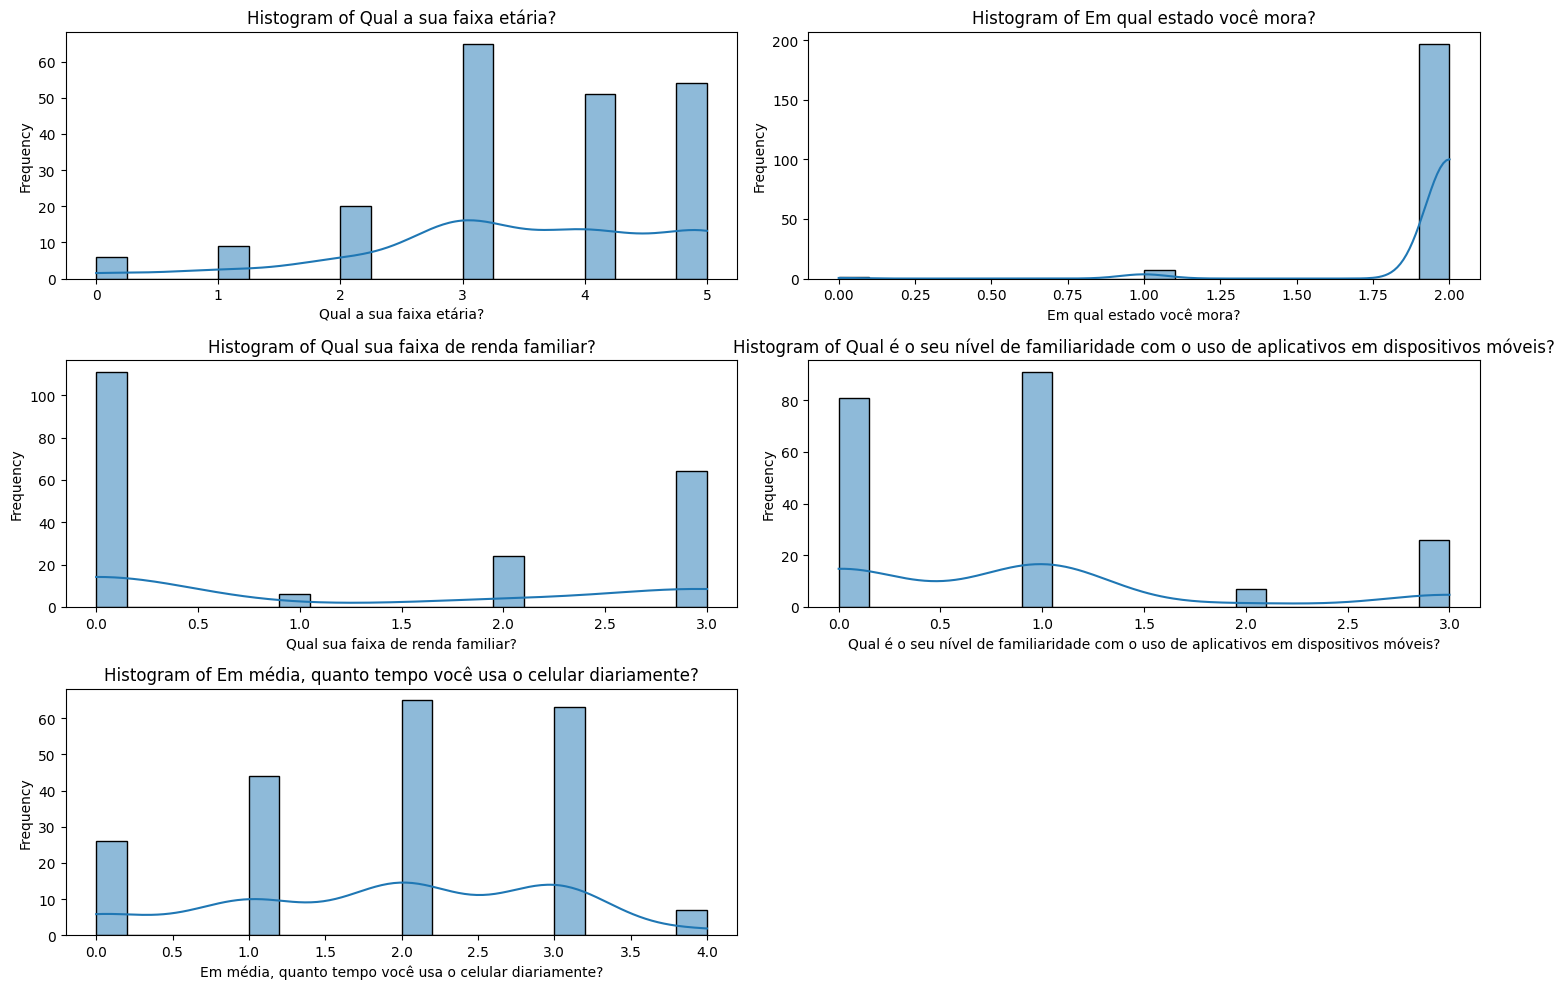

In [344]:
quantitative_columns = atributo.columns[:-1]

plt.figure(figsize=(15, 10))
for i, column in enumerate(quantitative_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(atributo[column], bins=20, kde=True)
    plt.title(f'Histogram of {column.strip()}')
    plt.xlabel(column.strip())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Removendo os outliers (IQR)

In [345]:
# def remove_outliers(df):
#     for column in df.columns[:-1]:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df

# atributo = remove_outliers(atributo)

# plt.figure(figsize=(15, 10))
# for i, column in enumerate(atributo.columns[:-1]):
#     plt.subplot(3, 2, i + 1)
#     sns.histplot(atributo[column], bins=20, kde=True)
#     plt.title(f'Histogram of {column.strip()} (Outliers Removed)')
#     plt.xlabel(column.strip())
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()
# cleaned_indices = atributo.index

# resposta = resposta.loc[cleaned_indices]

# resposta.reset_index(drop=True, inplace=True)
# atributo.reset_index(drop=True, inplace=True)
# display(resposta)
# display(atributo)

### Removendo os outliers (Z-score)

In [346]:
# from scipy import stats
# import numpy as np

# z_scores = np.abs(stats.zscore(atributo))
# atributo = atributo[(z_scores < 3).all(axis=1)]

# resposta = resposta.loc[atributo.index]

# resposta.reset_index(drop=True, inplace=True)
# atributo.reset_index(drop=True, inplace=True)


### Removendo os outliers (quartil removal)

In [347]:
# lower_bound = atributo.quantile(0.01)
# upper_bound = atributo.quantile(0.99)
# ## Melhor para o gaussian
# atributo = atributo[~((atributo < lower_bound) | (atributo > upper_bound)).any(axis=1)]

# resposta = resposta.loc[atributo.index]

# resposta.reset_index(drop=True, inplace=True)
# atributo.reset_index(drop=True, inplace=True)

### Removendo os outliers (Isolation forest)

In [348]:
# iso_forest = IsolationForest(contamination=0.05)
# y_pred = iso_forest.fit_predict(atributo)

# atributo = atributo[y_pred == 1]

# resposta = resposta.loc[atributo.index]

# resposta.reset_index(drop=True, inplace=True)
# atributo.reset_index(drop=True, inplace=True)

### Removendo os outliers (Local Outlier Factor)

In [349]:
# lof = LocalOutlierFactor(n_neighbors=20)
# y_pred = lof.fit_predict(atributo)

# atributo = atributo[y_pred == 1]

# resposta = resposta.loc[atributo.index]

# resposta.reset_index(drop=True, inplace=True)
# atributo.reset_index(drop=True, inplace=True)

### Removendo os outliers (Mahalanobis Distance)

In [350]:
# def mahalanobis(x, data):
#     x_minus_mu = x - np.mean(data)
#     cov = np.cov(data.T)
#     inv_covmat = np.linalg.inv(cov)
#     left = np.dot(x_minus_mu, inv_covmat)
#     mahal = np.dot(left, x_minus_mu.T)
#     return np.diag(mahal)

# mahal_dist = mahalanobis(atributo, atributo)

# threshold = np.percentile(mahal_dist, 95)  # Set the threshold to the 95th percentile

# atributo = atributo[mahal_dist < threshold]

# resposta = resposta.loc[atributo.index]

# resposta.reset_index(drop=True, inplace=True)
# atributo.reset_index(drop=True, inplace=True)

### Removendo os outliers (Tukey's Fences)

In [351]:
# k = 1.5

# for column in atributo.columns:
#     Q1 = atributo[column].quantile(0.25)
#     Q3 = atributo[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - k * IQR
#     upper_bound = Q3 + k * IQR

#     atributo = atributo[(atributo[column] >= lower_bound) & (atributo[column] <= upper_bound)]

# resposta = resposta.loc[atributo.index]
# resposta.reset_index(drop=True, inplace=True)
# atributo.reset_index(drop=True, inplace=True)

### Removendo os outliers (Capping/Winsorization)

In [352]:
# lower_percentile = 0.01
# upper_percentile = 0.99

# for column in atributo.columns:
#     lower_cap = atributo[column].quantile(lower_percentile)
#     upper_cap = atributo[column].quantile(upper_percentile)
    
#     atributo[column] = atributo[column].apply(lambda atributo: max(atributo, lower_cap))
    
#     atributo[column] = atributo[column].apply(lambda atributo: min(atributo, upper_cap))

# resposta = resposta.loc[atributo.index]

# resposta.reset_index(drop=True, inplace=True)
# atributo.reset_index(drop=True, inplace=True)


## Sepração de treino e teste

In [353]:
X_train, X_test, y_train, y_test = train_test_split(atributo, resposta, test_size=0.2, random_state=42)

## Oversampling

In [354]:
smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)

## Undersampling

In [355]:
# rus = RandomUnderSampler(random_state=0, sampling_strategy = 'majority')
# X_train, y_train = rus.fit_resample(X_train, y_train)


## Standart Scaler/PCA

In [356]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test) 

# pca = PCA(n_components=6)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test) 

# X_train = pd.DataFrame(X_train)

# X_test = pd.DataFrame(X_test)

# Modelos de Machine Learning

## Modelo Gaussian

### Validação simples

In [357]:
classificador_gaussian = GaussianNB()
classificador_gaussian.fit(X_train, y_train)
# Make predictions
y_pred = classificador_gaussian.predict(X_test)
matriz_confusao = confusion_matrix(y_test, y_pred)
print(matriz_confusao)

[[ 7  2]
 [ 6 26]]


c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Métricas da validação simples

In [358]:
report_gaussian = classification_report(y_test, y_pred, target_names=['Não', 'Sim'])
print(report_gaussian)

              precision    recall  f1-score   support

         Não       0.54      0.78      0.64         9
         Sim       0.93      0.81      0.87        32

    accuracy                           0.80        41
   macro avg       0.73      0.80      0.75        41
weighted avg       0.84      0.80      0.82        41



### Validação cruzada (cross validation)

In [359]:
gnb = GaussianNB()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []
best_model_gaussian = None
best_f1_score = -1 

for fold_index, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Create a new instance for each fold
    gnb.fit(X_fold_train, y_fold_train)
    
    y_pred = gnb.predict(X_fold_val)
    
    f1 = f1_score(y_fold_val, y_pred, average='macro')
    f1_scores.append(f1)
    print(f"Fold {fold_index + 1} - F1 Score: {f1:.4f}")
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model_gaussian = gnb


Fold 1 - F1 Score: 0.7159
Fold 2 - F1 Score: 0.6795
Fold 3 - F1 Score: 0.6940
Fold 4 - F1 Score: 0.7565
Fold 5 - F1 Score: 0.7126


c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-pack

### Treinando o melhor modelo encontrado no Cross Validation

In [360]:
best_model_gaussian.fit(X_train, y_train)
y_pred = best_model_gaussian.predict(X_test)

c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Métricas do melhor modelo

Report Gaussian Cross Val: 
               precision    recall  f1-score   support

         Não       0.54      0.78      0.64         9
         Sim       0.93      0.81      0.87        32

    accuracy                           0.80        41
   macro avg       0.73      0.80      0.75        41
weighted avg       0.84      0.80      0.82        41



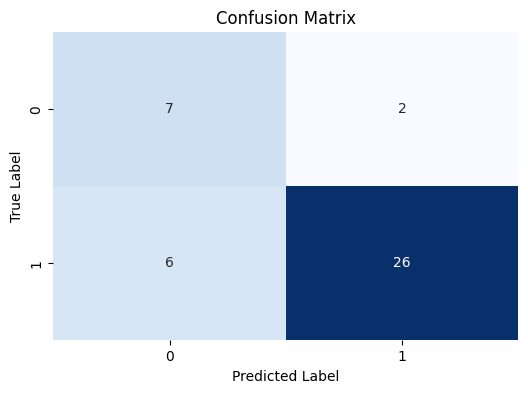

In [361]:
report_gaussian_cross_val = classification_report(y_test, y_pred, target_names=['Não', 'Sim'])
print("Report Gaussian Cross Val: \n", report_gaussian_cross_val)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Árvore de decisão

### Validação simples (Entropy)

In [362]:
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_entropy.fit(X_train, y_train)

y_pred_entropy = tree_entropy.predict(X_test)

### Métricas da validação simples (Entropy)

In [363]:
print("Classification Report for Decision Tree (Entropy):")
print(classification_report(y_test, y_pred_entropy, target_names=['Yes', 'No']))

Classification Report for Decision Tree (Entropy):
              precision    recall  f1-score   support

         Yes       0.20      0.33      0.25         9
          No       0.77      0.62      0.69        32

    accuracy                           0.56        41
   macro avg       0.48      0.48      0.47        41
weighted avg       0.64      0.56      0.59        41



### Validação simples (Gini)

In [364]:
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_gini.fit(X_train, y_train)

y_pred_gini = tree_gini.predict(X_test)

### Métricas validação simples

Métricas modelo Gini:
              precision    recall  f1-score   support

         Yes       0.20      0.33      0.25         9
          No       0.77      0.62      0.69        32

    accuracy                           0.56        41
   macro avg       0.48      0.48      0.47        41
weighted avg       0.64      0.56      0.59        41



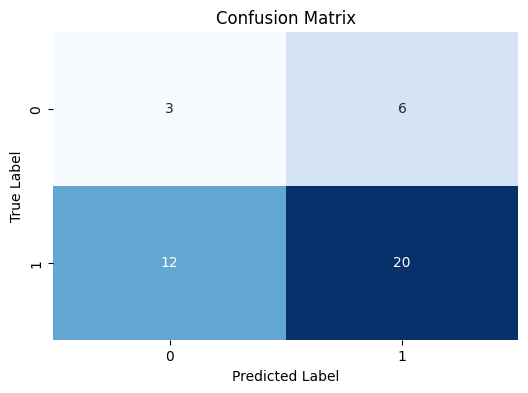

Métricas modelo Entropy:
              precision    recall  f1-score   support

         Yes       0.20      0.33      0.25         9
          No       0.77      0.62      0.69        32

    accuracy                           0.56        41
   macro avg       0.48      0.48      0.47        41
weighted avg       0.64      0.56      0.59        41



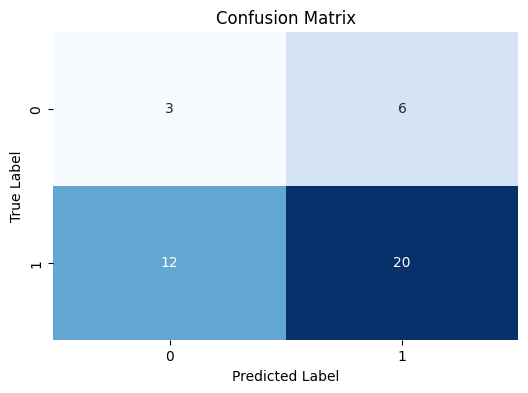

In [365]:
print("Métricas modelo Gini:")
print(classification_report(y_test, y_pred_gini, target_names=['Yes', 'No']))
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Métricas modelo Entropy:")
print(classification_report(y_test, y_pred_entropy, target_names=['Yes', 'No']))
cm = confusion_matrix(y_test, y_pred_entropy)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Usando o GridSearchCV para pegar os melhores parâmetros

In [366]:
# Definir os parâmetros do grid
parametros = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}
classificador_tree = tree.DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(estimator=classificador_tree, param_grid=parametros, cv=5, verbose=1)

grid.fit(X_train, y_train)
melhor_f1 = (grid.best_score_)

print("Média dos melhores F1 scores para a classe 'Sim': ", melhor_f1)

resultados = pd.DataFrame(grid.cv_results_)
# display(resultados)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits
Média dos melhores F1 scores para a classe 'Sim':  0.8400000000000001


### Plotando os gráficos do grid

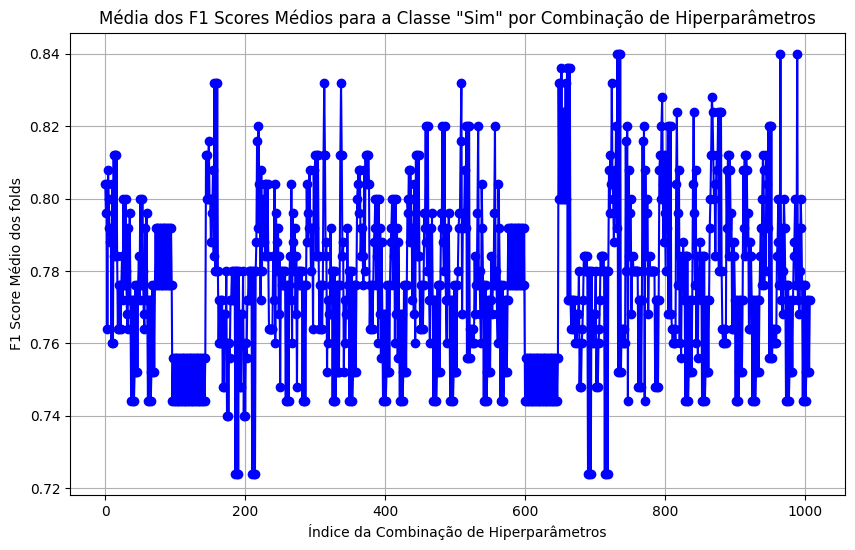

In [367]:
plt.figure(figsize=(10, 6))
plt.plot(resultados['mean_test_score'], marker='o', linestyle='-', color='b')
plt.title('Média dos F1 Scores Médios para a Classe "Sim" por Combinação de Hiperparâmetros')
plt.xlabel('Índice da Combinação de Hiperparâmetros')
plt.ylabel('F1 Score Médio dos folds')
plt.grid(True)
plt.show()

### Plot das árvores

In [368]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(30, 7))
# tree.plot_tree(classificador_gini,
#             feature_names=atributo.columns,
#             class_names= classificador_gini.classes_,
#             filled= True);

# plt.figure(figsize=(30, 7))
# tree.plot_tree(classificador_entropy,
#             feature_names=atributo.columns,
#             class_names= classificador_entropy.classes_,
#             filled= True);

### Testando o melhor modelo

In [369]:
# Acessando os melhores hiperparâmetros obtidos
melhores_parametros = grid.best_params_
# Criando um novo classificador com esses hiperparâmetros
classificador_tree = tree.DecisionTreeClassifier(
    criterion=melhores_parametros['criterion'],
    splitter=melhores_parametros['splitter'],
    max_depth=melhores_parametros['max_depth'],
    min_samples_split=melhores_parametros['min_samples_split'],
    min_samples_leaf=melhores_parametros['min_samples_leaf'],
    max_features=melhores_parametros['max_features'],
    random_state=42
)

# Treinando o modelo com os dados de treino
classificador_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=42)

### Métricas do melhor modelo

Report Best: 
               precision    recall  f1-score   support

         Não       0.42      0.56      0.48         9
         Sim       0.86      0.78      0.82        32

    accuracy                           0.73        41
   macro avg       0.64      0.67      0.65        41
weighted avg       0.76      0.73      0.74        41

[[ 5  4]
 [ 7 25]]


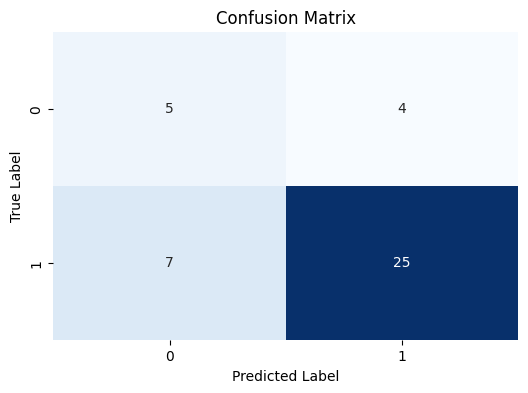

In [370]:
# Fazendo previsões com os dados de teste
classificador_tree_predict = classificador_tree.predict(X_test)

report_tree_best = classification_report(y_test, classificador_tree_predict)
print("Report Best: \n", report_tree_best)

matriz_confusao = confusion_matrix(y_test, classificador_tree_predict)
print(matriz_confusao)

cm = confusion_matrix(y_test, classificador_tree_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## KNN

### Validação simples

In [371]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Métricas da validação simples

Classification Report for KNN Classifier:
              precision    recall  f1-score   support

         Yes       0.13      0.22      0.17         9
          No       0.73      0.59      0.66        32

    accuracy                           0.51        41
   macro avg       0.43      0.41      0.41        41
weighted avg       0.60      0.51      0.55        41



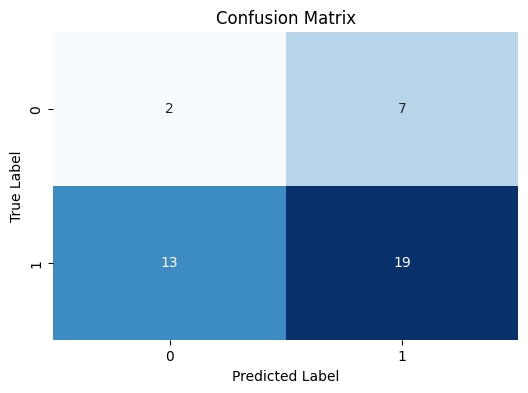

In [372]:
print("Classification Report for KNN Classifier:")
print(classification_report(y_test, y_pred, target_names=['Yes', 'No']))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Escolhendo o K com o GridSearchCV

In [373]:
classificador_knn = KNeighborsClassifier()

parametros = {
    'n_neighbors': range(1, int(round(math.sqrt(len(X_train)), 0))),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(20, 50, 5),
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search_knn = GridSearchCV(estimator=classificador_knn, param_grid=parametros, cv=cv, verbose=1)
grid_search_knn.fit(X_train, y_train)

resultados_knn = pd.DataFrame(grid_search_knn.cv_results_)

# display(resultados)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-package

### Plotando o gráfico dos resultados do GridSearchCV

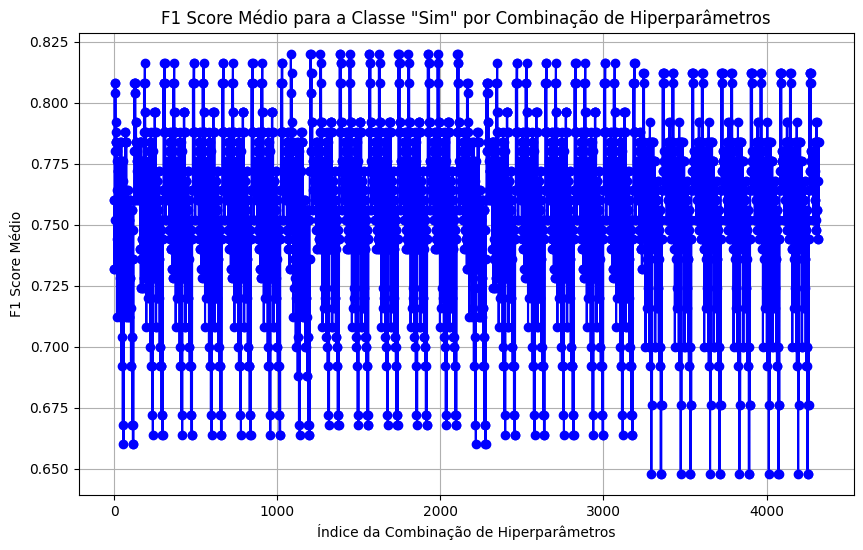

Melhores hiperparâmetros:  {'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
Melhor F1 Score:  0.82


In [374]:
# Plotar os F1 scores para cada combinação de hiperparâmetros
plt.figure(figsize=(10, 6))
plt.plot(resultados_knn['mean_test_score'], marker='o', linestyle='-', color='b')
plt.title('F1 Score Médio para a Classe "Sim" por Combinação de Hiperparâmetros')
plt.xlabel('Índice da Combinação de Hiperparâmetros')
plt.ylabel('F1 Score Médio')
plt.grid(True)
plt.show()

# Imprimindo os melhores hiperparâmetros e a melhor F1 Score
print("Melhores hiperparâmetros: ", grid_search_knn.best_params_)
print("Melhor F1 Score: ", grid_search_knn.best_score_)

### Testando o melhor modelo do Grid Search CV

In [375]:
melhores_parametros_knn = grid_search_knn.best_params_
classificador_knn = KNeighborsClassifier(
    n_neighbors=melhores_parametros_knn['n_neighbors'],
    weights=melhores_parametros_knn['weights'],
    algorithm=melhores_parametros_knn['algorithm'],
    leaf_size=melhores_parametros_knn['leaf_size'],
    p=melhores_parametros_knn['p'],
    metric=melhores_parametros_knn['metric'],
)

classificador_knn.fit(X_train, y_train)

c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=2, p=1)

Relatório de classificação KNN: 
               precision    recall  f1-score   support

         Não       0.19      0.33      0.24         9
         Sim       0.76      0.59      0.67        32

    accuracy                           0.54        41
   macro avg       0.47      0.46      0.45        41
weighted avg       0.63      0.54      0.57        41



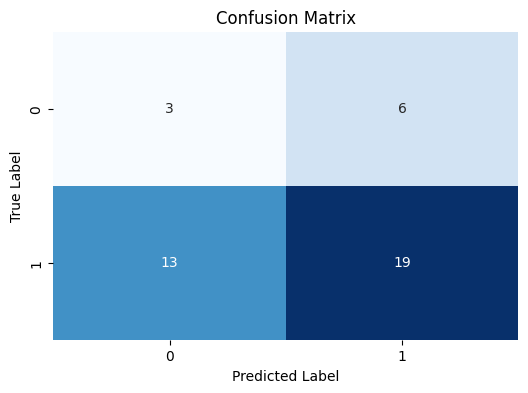

In [376]:
knn_predict = classificador_knn.predict(X_test)

report_knn = classification_report(y_test, knn_predict, target_names=['Não', 'Sim'])
print("Relatório de classificação KNN: \n", report_knn)

cm = confusion_matrix(y_test, knn_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Serialização

In [377]:
teste = pd.DataFrame({
    'Qual a sua faixa etária?': ['18-29'],
    'Em qual estado você mora?': ['São Paulo'],
    'Qual sua faixa de renda familiar?': ['R$ 2001 a R$ 5000'],
    'Qual é o seu nível de familiaridade com o uso de aplicativos em dispositivos móveis?': ['Moderadamente familiarizado'],
    'Em média, quanto tempo você usa o celular diariamente?': ['2 Horas'],
    'Você se interessaria em jogar palavra cruzada, sudoku ou jogos similares a esses diariamente?': ['Sim']
})

print(teste)


  Qual a sua faixa etária? Em qual estado você mora?  \
0                    18-29                 São Paulo   

  Qual sua faixa de renda familiar?  \
0                 R$ 2001 a R$ 5000   

  Qual é o seu nível de familiaridade com o uso de aplicativos em dispositivos móveis?  \
0                        Moderadamente familiarizado                                     

  Em média, quanto tempo você usa o celular diariamente?  \
0                                            2 Horas       

  Você se interessaria em jogar palavra cruzada, sudoku ou jogos similares a esses diariamente?  
0                                                Sim                                             


In [378]:
pipeline = Pipeline(steps=[
    ('preprocessador', preprocessador),
    ('model', best_model_gaussian)
])


# Salvar o pipeline em um arquivo
with open('pipeline.pkl', 'wb') as arquivo:
    joblib.dump(pipeline, arquivo)


# Carregando o pipeline
with open('pipeline.pkl', 'rb') as arquivo:
    pipeline_carregado = joblib.load(arquivo)

# Access the ColumnTransformer directly from the pipeline
preprocessor = pipeline_carregado.named_steps['preprocessador']

# Get the encoder (OrdinalEncoder) from the transformers_ list
# This assumes that the first transformer is the one with the encoder
encoder = preprocessor.transformers_[0][1]  # No 'named_steps' needed here

# Check the categories learned by the encoder
print(encoder.categories_)


# Fazer previsões diretamente com os dados de teste
# Preprocess the test data
teste_preprocessed = pipeline_carregado.named_steps['preprocessador'].transform(teste)

# # Then make predictions
predicoes = pipeline_carregado.named_steps['model'].predict(teste_preprocessed)

print("Previsões:", predicoes)


# # Exibir as previsões
# print("Previsões:", predicoes)

[array(['18-29', '30-39', '40-49', '50-60', '61 ou mais', 'Menos de 18'],
      dtype=object), array(['Minas Gerais', 'Outro', 'São Paulo'], dtype=object), array(['Mais de R$ 10000', 'R$ 0 a R$ 2000', 'R$ 2001 a R$ 5000',
       'R$ 5001 a R$ 10000'], dtype=object), array(['Moderadamente familiarizado', 'Muito familiarizado',
       'Nada familiarizado', 'Pouco familiarizado'], dtype=object), array(['2 Horas', '3 Horas', '4 Horas', 'Mais de 5 horas',
       'Menos de 1 hora'], dtype=object), array(['Não', 'Sim'], dtype=object)]
Previsões: ['Sim']


c:\Users\daviichihara-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [379]:
print("Report Gaussian: \n", report_gaussian_cross_val)
report_tree_best = classification_report(y_test, classificador_tree_predict)
print("Report Best: \n", report_tree_best)
report_knn = classification_report(y_test, knn_predict, target_names=['Não', 'Sim'])
print("Report KNN: \n", report_knn)


Report Gaussian: 
               precision    recall  f1-score   support

         Não       0.54      0.78      0.64         9
         Sim       0.93      0.81      0.87        32

    accuracy                           0.80        41
   macro avg       0.73      0.80      0.75        41
weighted avg       0.84      0.80      0.82        41

Report Best: 
               precision    recall  f1-score   support

         Não       0.42      0.56      0.48         9
         Sim       0.86      0.78      0.82        32

    accuracy                           0.73        41
   macro avg       0.64      0.67      0.65        41
weighted avg       0.76      0.73      0.74        41

Report KNN: 
               precision    recall  f1-score   support

         Não       0.19      0.33      0.24         9
         Sim       0.76      0.59      0.67        32

    accuracy                           0.54        41
   macro avg       0.47      0.46      0.45        41
weighted avg       0.63   

# Alguns dados interessantes

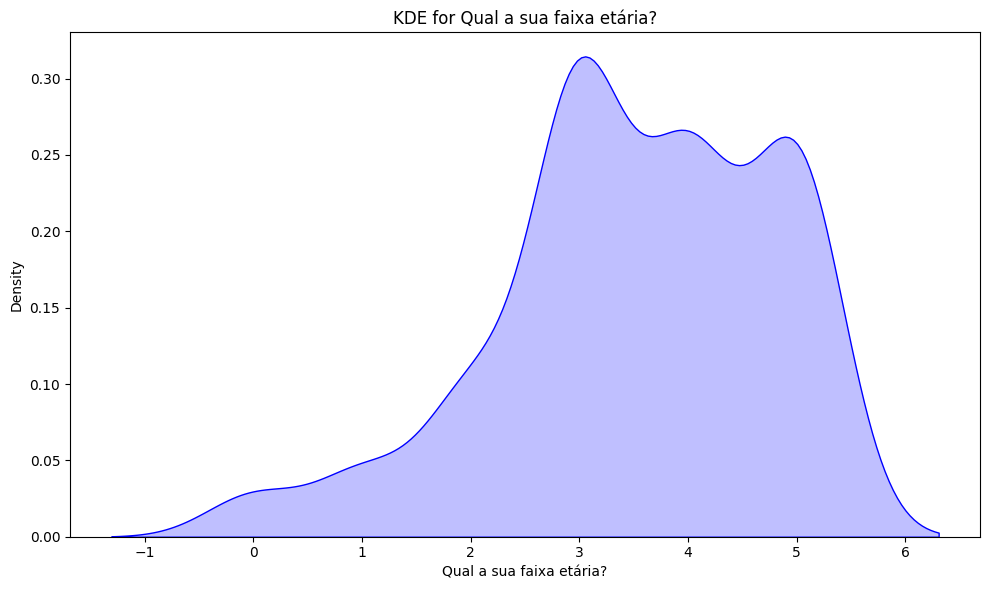

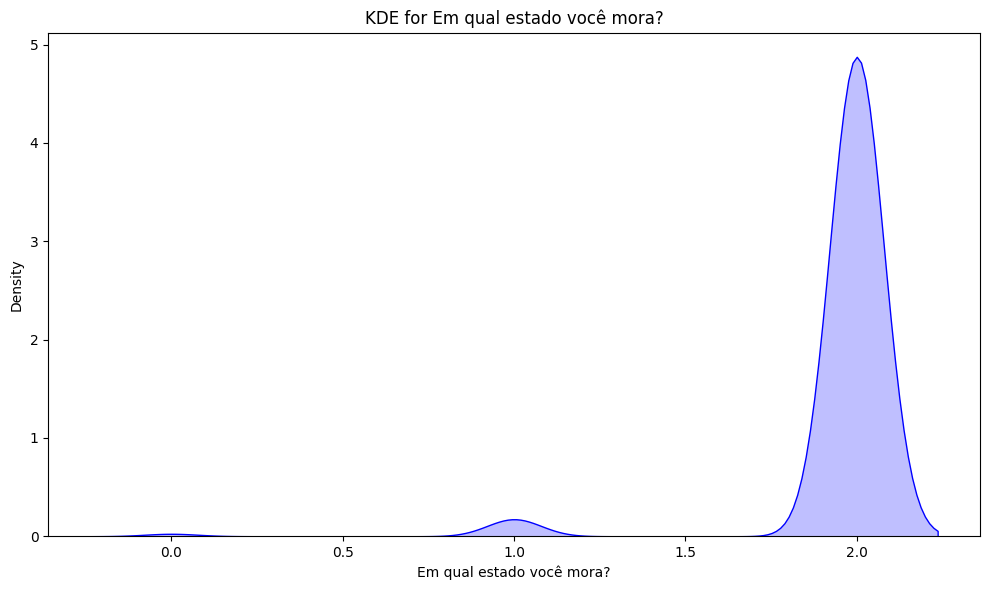

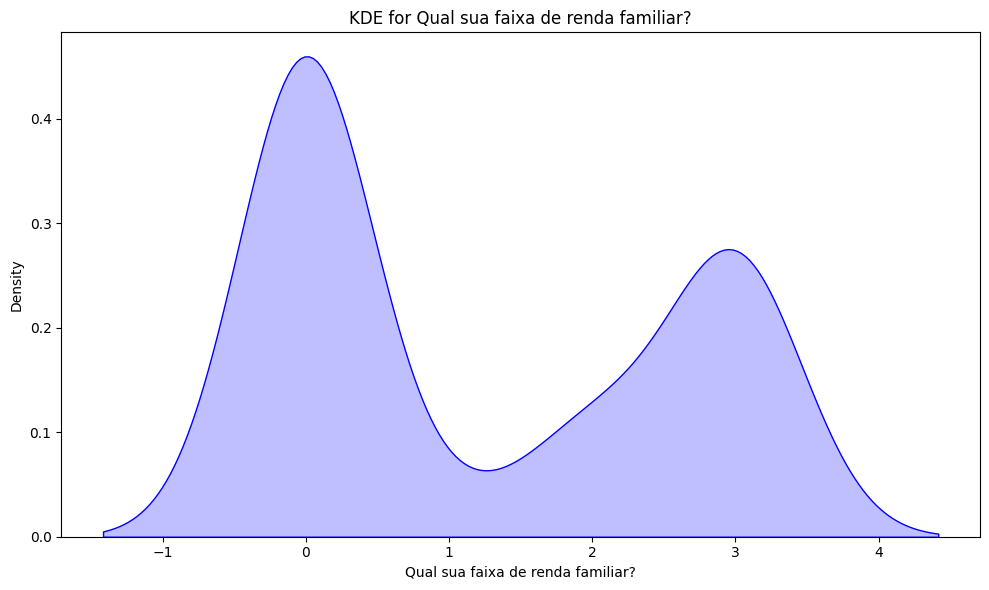

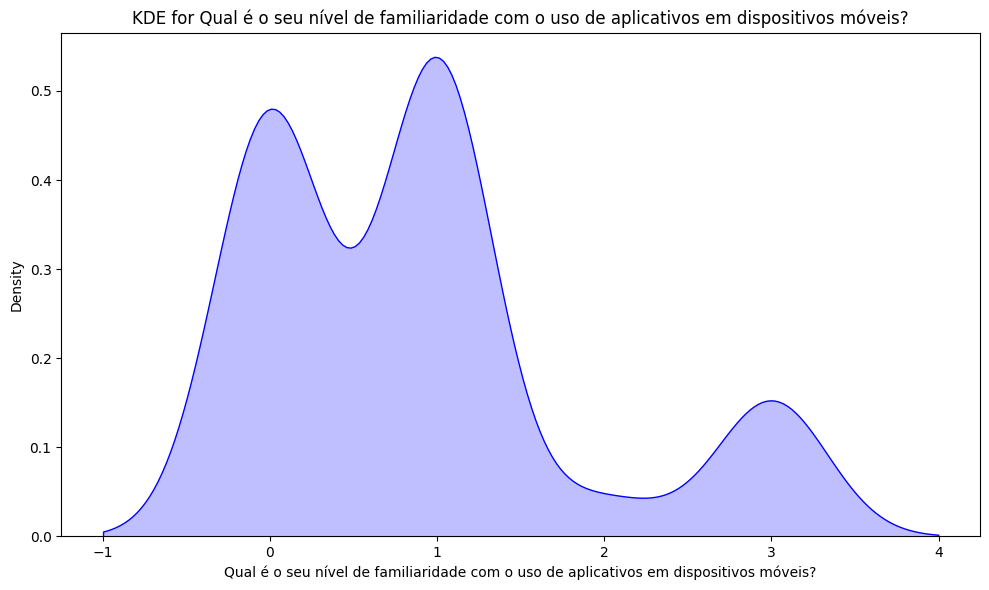

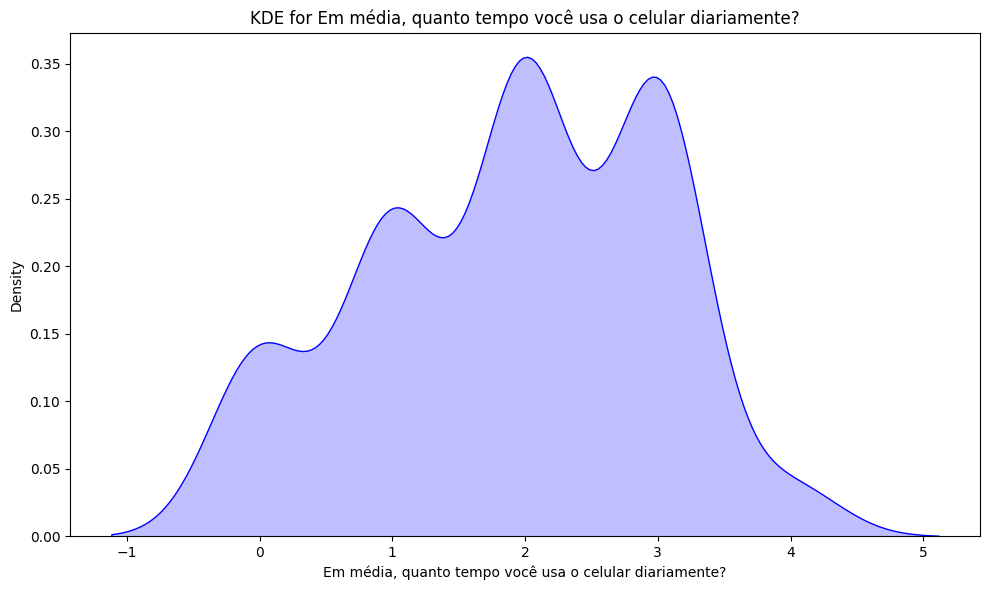

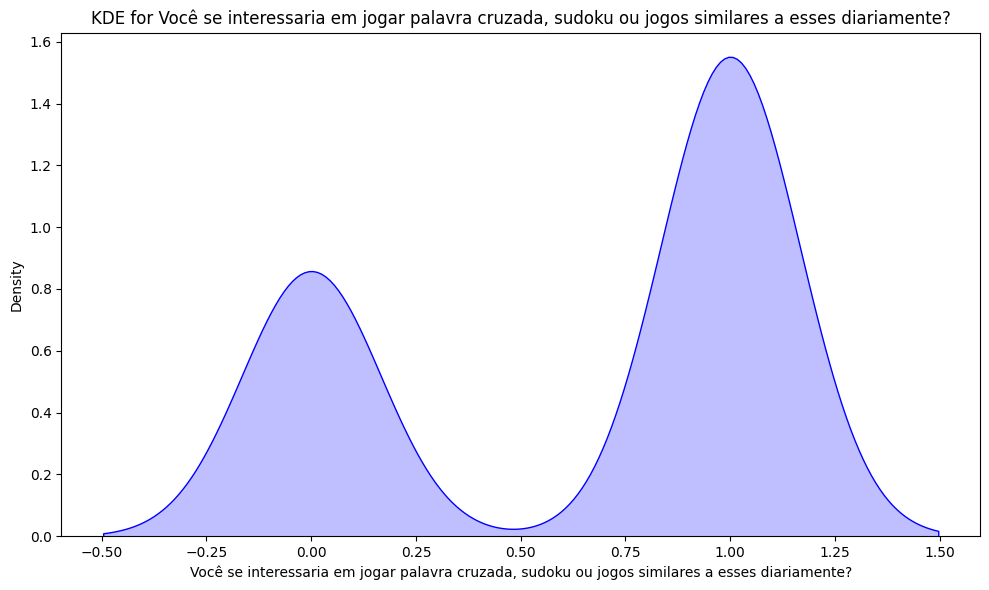

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you want to plot
columns_to_plot = [
    'Qual a sua faixa etária?',
    'Em qual estado você mora?',
    'Qual sua faixa de renda familiar?',
    'Qual é o seu nível de familiaridade com o uso de aplicativos em dispositivos móveis?',
    'Em média, quanto tempo você usa o celular diariamente?',
    'Você se interessaria em jogar palavra cruzada, sudoku ou jogos similares a esses diariamente?'
]

# Loop through each column and create a new figure for each
for column in columns_to_plot:
    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot the KDE
    sns.kdeplot(atributo[column], fill=True, color="b")

    # Set title and labels
    plt.title(f'KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

    # Show the plot
    plt.tight_layout()
    plt.show()


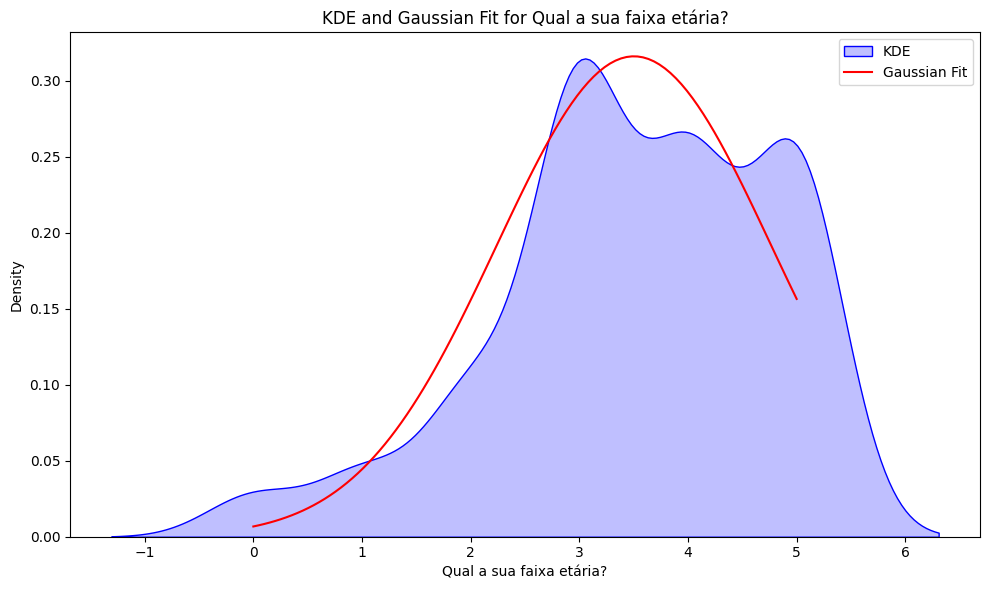

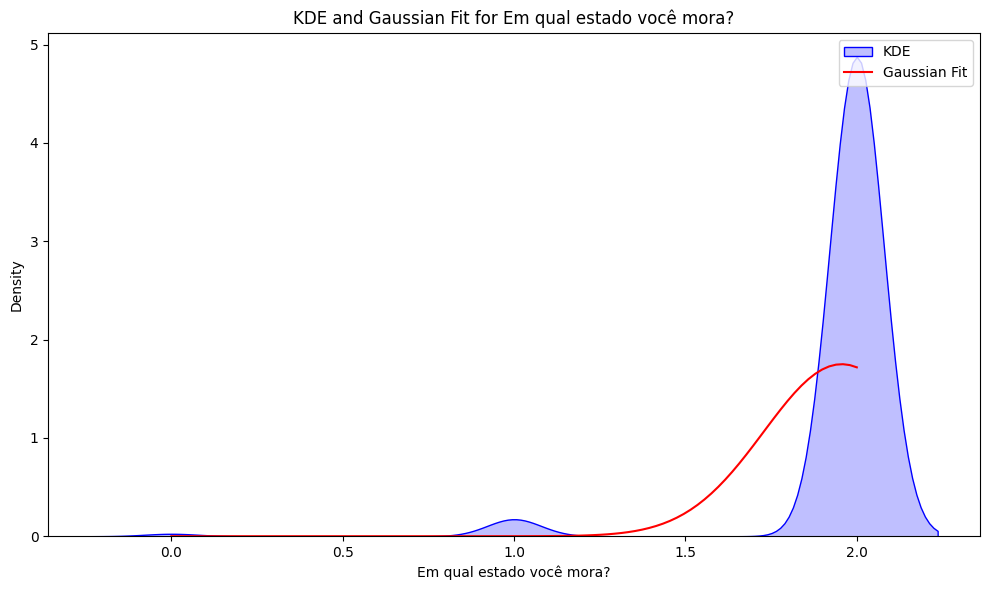

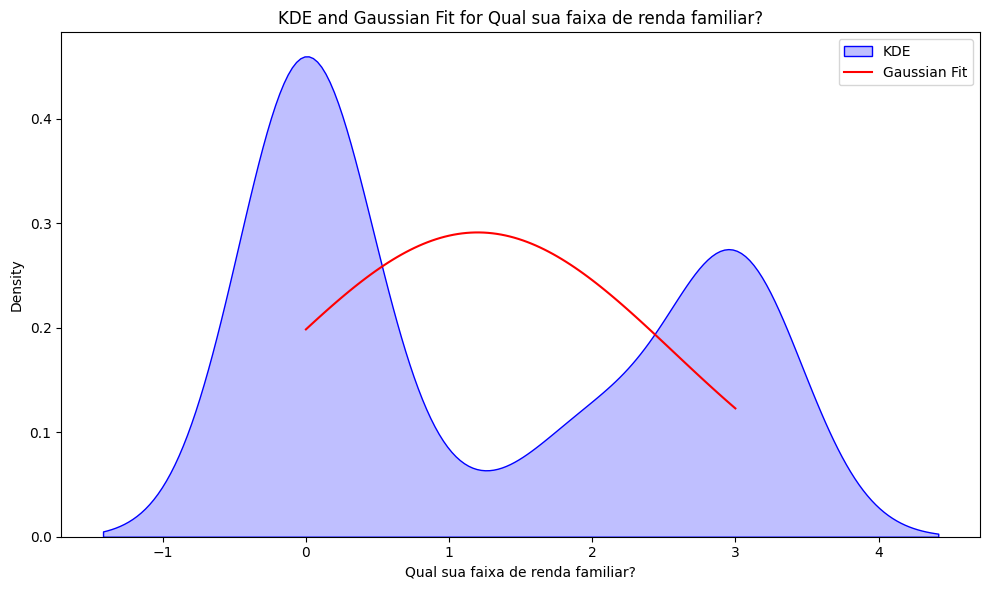

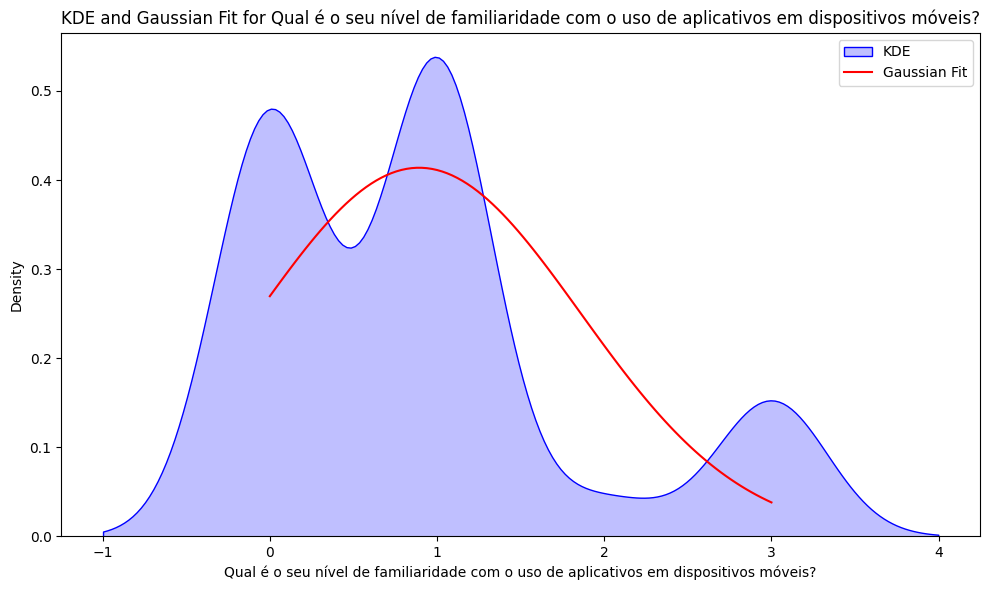

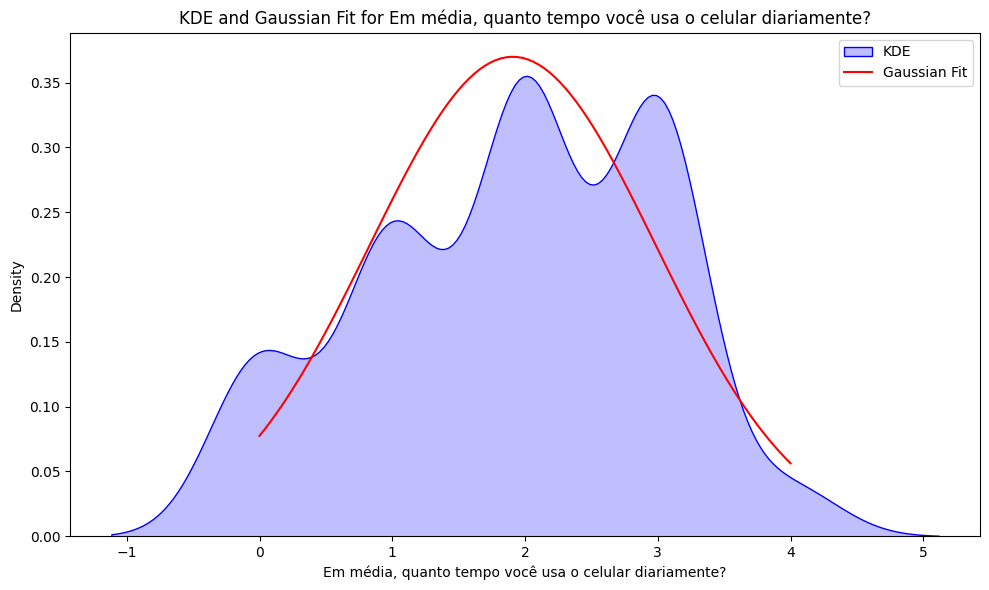

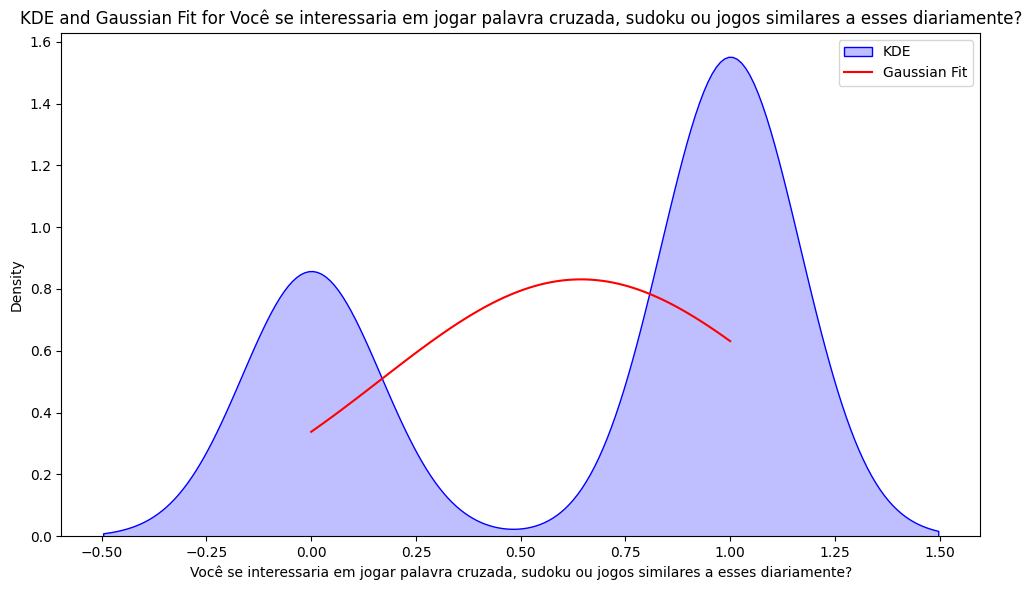

In [381]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Function to plot KDE with Gaussian fit
def plot_kde_with_gaussian(data, column):
    plt.figure(figsize=(10, 6))
    
    # Plot KDE
    sns.kdeplot(data[column], fill=True, color='b', label='KDE')

    # Calculate mean and std
    mean = data[column].mean()
    std = data[column].std()

    # Plot the Gaussian distribution
    x = np.linspace(data[column].min(), data[column].max(), 100)
    plt.plot(x, norm.pdf(x, mean, std), color='r', label='Gaussian Fit')

    plt.title(f'KDE and Gaussian Fit for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Loop through columns and plot
for column in columns_to_plot:
    plot_kde_with_gaussian(atributo, column)
